In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline
import io

In [0]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [0]:
uploaded1=files.upload()

Saving test.csv to test.csv


In [0]:
uploaded2=files.upload()

Saving gender_submission.csv to gender_submission.csv


In [0]:
train=pd.read_csv(io.BytesIO(uploaded["train.csv"]))
test=pd.read_csv(io.BytesIO(uploaded1["test.csv"]))
gs=pd.read_csv(io.BytesIO(uploaded2["gender_submission.csv"]))

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
gs.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


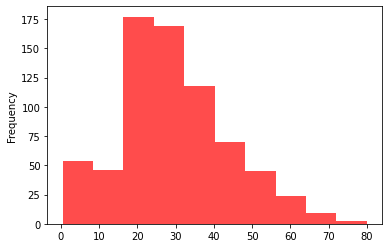

In [0]:
#different age group people
train.Age.plot.hist(alpha=0.7,color='red')

# DATA DESCRIPTION
1. SURVIVED: 0=NO, 1=YES
2. PCLASS(TICKETS CLASS): 1=1ST, 2=2ND, 3=3RD
3. SEX: MALE OR FEMALE
4. AGE: IN YEARS
5. SIBSP: NUMBER OF SIBLINGS/SPOUSES ABOARD THE TITANIC
6. PARCH: NUMBER OF PARENTS/CHILDREN ABOARD THE TITANIC
7. TICKET: TICKET ID
8. FARE: PASSENGER FARE
9. CABIN: CABIN NUMBER
10. EMBARKED: PORT OF EMBARKMENT. C=CHERBOURG, Q=QUEENSTOWN, S=SOUTHAMPTON

In [0]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Holes In Our Data

What missing values are there?

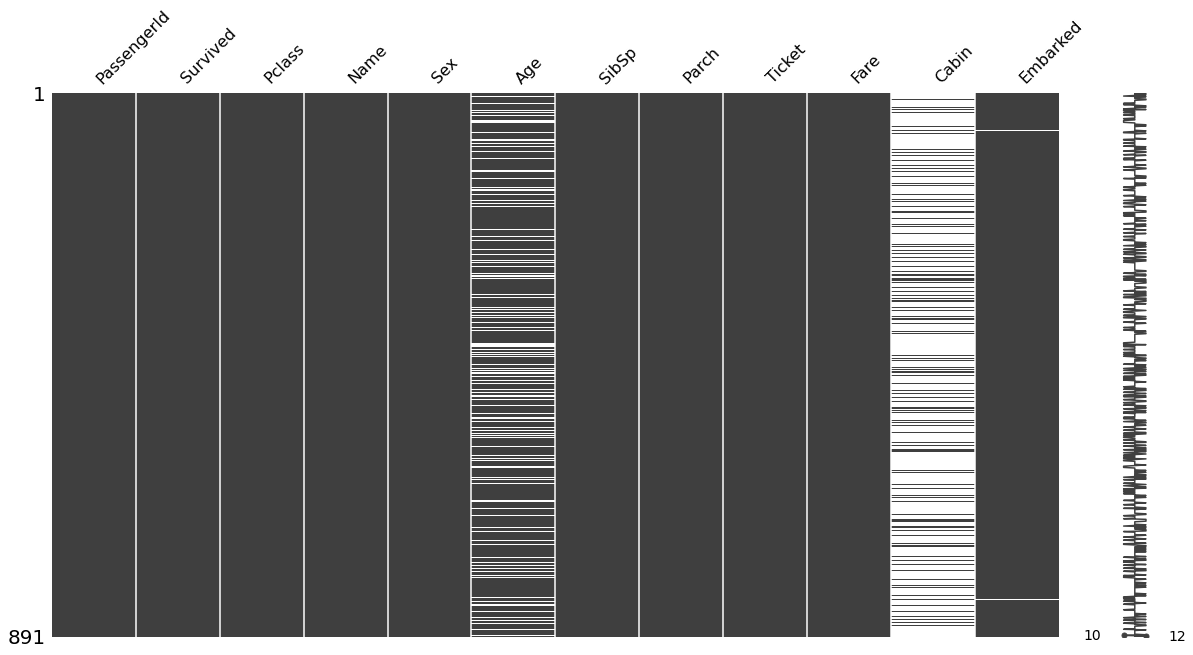

In [0]:
#missing values in each column
missingno.matrix(train,figsize=(20,10))

Okay. So we can clearly see there are some missing values in Age, Cabin and Embarked column.

In [0]:
#total no of missing values in each column
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# To perform our data analysis, we need to create two new dataframes
One for discretised variables and another for continuous variables.

In [0]:
df_bin=pd.DataFrame()   #for discretised continuous variables
df_con=pd.DataFrame()   #for continuous variables

# What are the types of dataframe?
Now we have to check the data type of each column so that we can categorise them and encode them properly to feed our machine learning model.

In [0]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Now let's explore our data by each column
We'll go through each column iteratively and see which ones to use in our first models. Some may need more preprocessing than others to get ready.


In [0]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Target Feature : SURVIVED
Key 0 = Did not survive, Key 1 = Survived

0    549
1    342
Name: Survived, dtype: int64


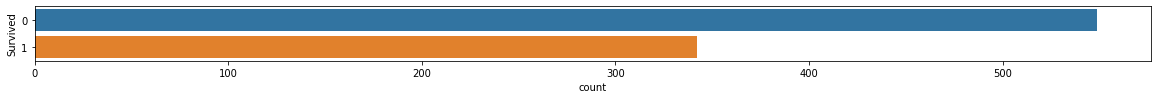

In [0]:
#How many people survived?
plt.figure(figsize=(20,1))
sns.countplot(y='Survived',data=train)
print(train['Survived'].value_counts())

In [0]:
#Let's add this to our subset dataframes
df_bin['Survived']=train['Survived']
df_con['Survived']=train['Survived']

In [0]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [0]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Target Feature : PCLASS
Key 1 = 1st class, Key 2 = 2nd class, Key 3 = 3rd class

3    491
1    216
2    184
Name: Pclass, dtype: int64


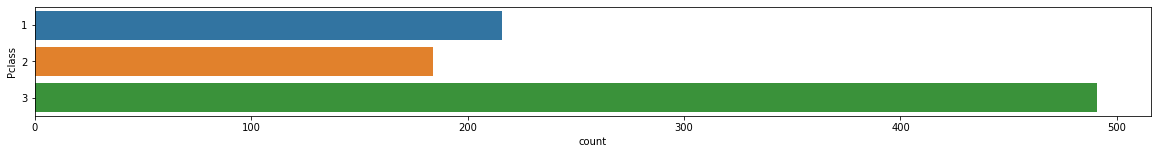

In [0]:
#visualizing no of peoples in each class
plt.figure(figsize=(20,2))
sns.countplot(y='Pclass',data=train)
print(train['Pclass'].value_counts())

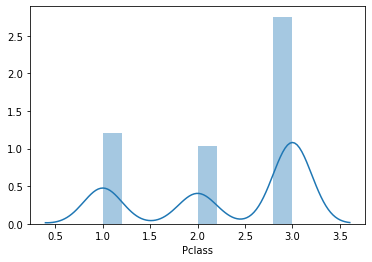

In [0]:
#let's look into the distribution so that we can understand it clearly
sns.distplot(train['Pclass'])

This data is a categorical one even though it is numerical.

In [0]:
#we have 0 null values in Pclass, so put these values into our sub dataframes
df_bin['Pclass']=train['Pclass']
df_con['Pclass']=train['Pclass']

In [0]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [0]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


# Target Feature : NAME
Names of the passengers.

In [0]:
#There are no null values in name
#let's see how many different names are there
train['Name'].value_counts() 

Andersen-Jensen, Miss. Carla Christine Nielsine    1
Elsbury, Mr. William James                         1
Dean, Master. Bertram Vere                         1
Stead, Mr. William Thomas                          1
Nosworthy, Mr. Richard Cater                       1
                                                  ..
Sloper, Mr. William Thompson                       1
Markun, Mr. Johann                                 1
Beckwith, Mr. Richard Leonard                      1
McCarthy, Mr. Timothy J                            1
Keane, Miss. Nora A                                1
Name: Name, Length: 891, dtype: int64

So we can see that there are 891 unique names which equals the no of training examples. Because of so many different names and to keep this EDA fast, we won't move forward using the name variable.

# Target Feature : SEX
Male and Female

In [0]:
#There are no null values in sex column
#let's count the no of male and female
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

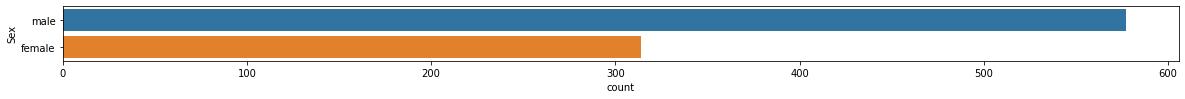

In [0]:
#let's visualize
plt.figure(figsize=(20,1))
sns.countplot(y='Sex',data=train)

In [0]:
#encode sex
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])

In [0]:
#let's add this sex to our sub dataframes
df_bin['Sex']=train['Sex']
df_con['Sex']=train['Sex']

In [0]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


In [0]:
df_con.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


# Target Feature : AGE
Ages in years

In [0]:
#How many missing values are there in age?
train['Age'].isnull().sum()

177

In [0]:
#Let's fill these missing values by taking the median 
import math
median_age=math.floor(train['Age'].median())
train['Age']=train['Age'].fillna(median_age)

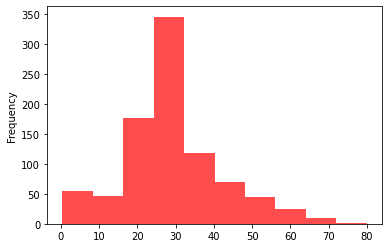

In [0]:
#Let's visualize
train['Age'].plot.hist(alpha=0.7,color='red')

In [0]:
#let's add these values into our continuous dataframe directly
#And add by making bins into our discretised continuous dataframe
df_bin['Age']=pd.cut(train['Age'],bins=5)
df_con['Age']=train['Age']

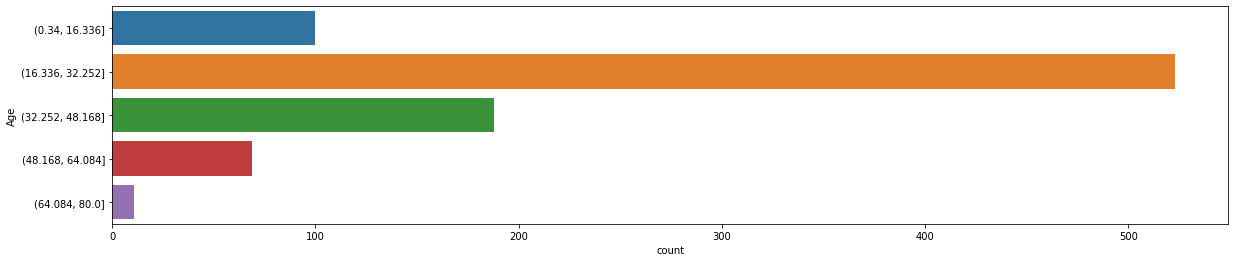

In [0]:
#let's visualize our discretised dataframe
plt.figure(figsize=(20,4))
sns.countplot(y='Age',data=df_bin)

In [0]:
df_bin.head()

,Survived,Pclass,Sex,Age
0,0,3,1,"(16.336, 32.252]"
1,1,1,0,"(32.252, 48.168]"
2,1,3,0,"(16.336, 32.252]"
3,1,1,0,"(32.252, 48.168]"
4,0,3,1,"(32.252, 48.168]"


In [0]:
df_con.head()

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


# Target Feature : SIBSP
The number of siblings/spouses aboard the titanic

In [0]:
#There are no missing values in sibsp
#let's see the number of sibsp per count
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

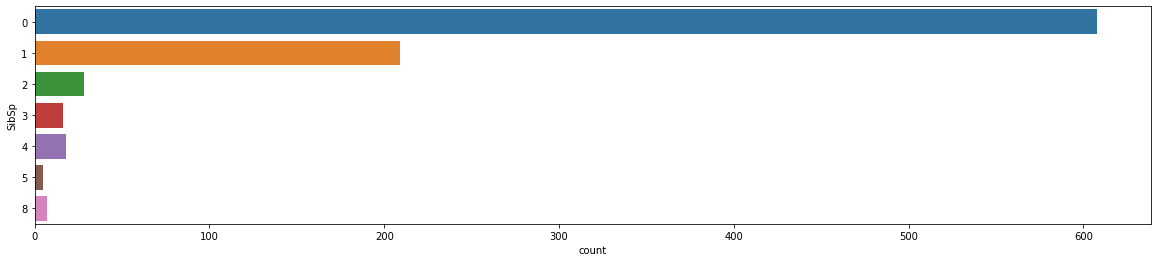

In [0]:
#let's visualize the counts of sibsp
plt.figure(figsize=(20,4))
sns.countplot(y='SibSp',data=train)

In [0]:
#let's add these values in our sub dataframes
df_bin['SibSp']=train['SibSp']
df_con['SibSp']=train['SibSp']

In [0]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,1,"(16.336, 32.252]",1
1,1,1,0,"(32.252, 48.168]",1
2,1,3,0,"(16.336, 32.252]",0
3,1,1,0,"(32.252, 48.168]",1
4,0,3,1,"(32.252, 48.168]",0


In [0]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,1,22.0,1
1,1,1,0,38.0,1
2,1,3,0,26.0,0
3,1,1,0,35.0,1
4,0,3,1,35.0,0


# Target Feature : PARCH
The number of parents/children aboard the titanic

In [0]:
#There are no missing values in parch
#Let's see the counts of parents/children
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

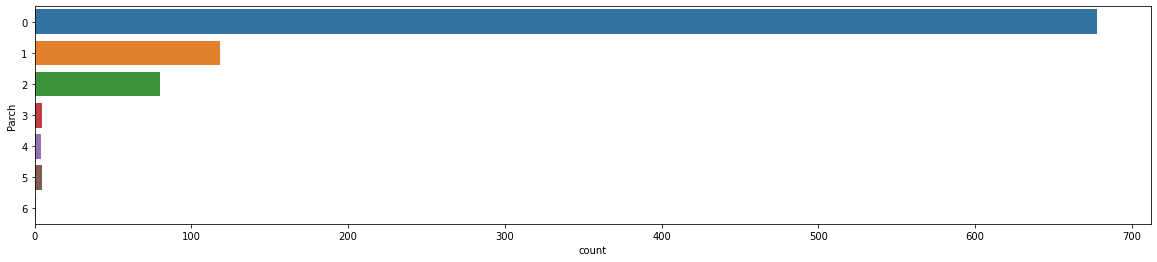

In [0]:
#let's visualize the counts of parch
plt.figure(figsize=(20,4))
sns.countplot(y='Parch',data=train)

In [0]:
#let's add these values in our sub dataframes
df_bin['Parch']=train['Parch']
df_con['Parch']=train['Parch']

In [0]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,"(16.336, 32.252]",1,0
1,1,1,0,"(32.252, 48.168]",1,0
2,1,3,0,"(16.336, 32.252]",0,0
3,1,1,0,"(32.252, 48.168]",1,0
4,0,3,1,"(32.252, 48.168]",0,0


In [0]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


# Target Feature : TICKET
Ticket number of passengers.

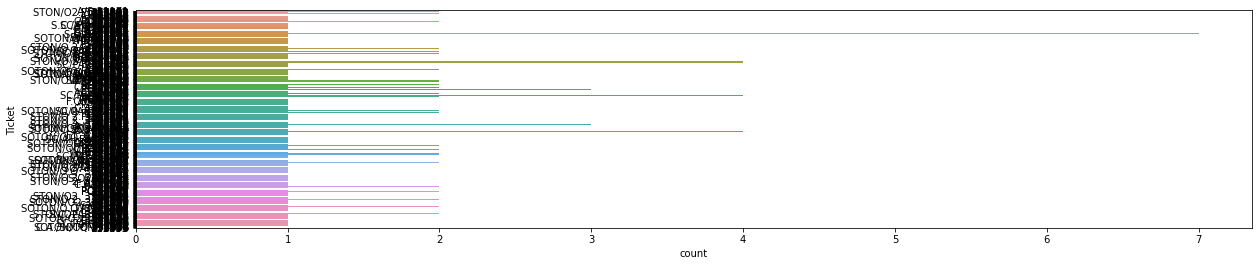

In [0]:
#There are no missing valus in tickets
#let's visualize the count of tickets
plt.figure(figsize=(20,4))
sns.countplot(y='Ticket',data=train)

In [0]:
#let's see the counts in another way
train['Ticket'].value_counts()

CA. 2343           7
347082             7
1601               7
3101295            6
CA 2144            6
                  ..
349219             1
12460              1
11753              1
SOTON/OQ 392090    1
350043             1
Name: Ticket, Length: 681, dtype: int64

So there are 681 unique tickets which is a pretty large number. So we won't use Ticket for our sub dataframes just like Name column.

# Target Feature : FARE
Cost of Tickets

In [0]:
#There are no missing values in Fare
#How many unique fares are there?
train['Fare'].value_counts()
#So there are 248 unique values of fare

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

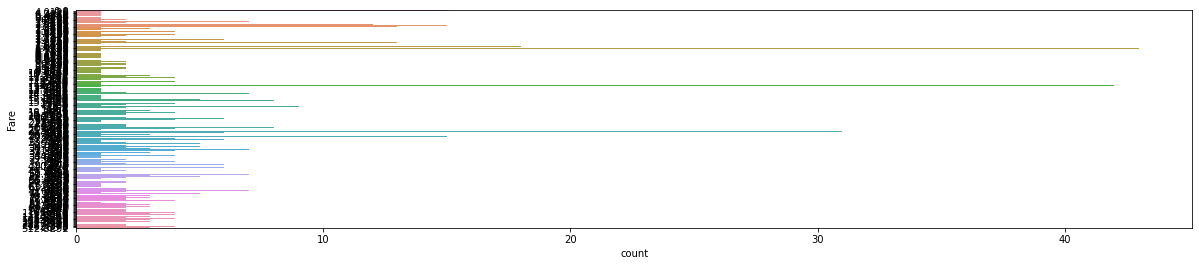

In [0]:
#let's visualize
plt.figure(figsize=(20,4))
sns.countplot(y='Fare',data=train)

In [0]:
#What data type is Fare?
train['Fare'].dtype

dtype('float64')

In [0]:
#So as it is of float64 datatype we will add all these values into our 
#continuous variables dataframe and we will cut these values into bins to add 
#them into our dicretised continuous variables dataframe
df_bin['Fare']=pd.cut(train['Fare'],bins=5)
df_con['Fare']=train['Fare']

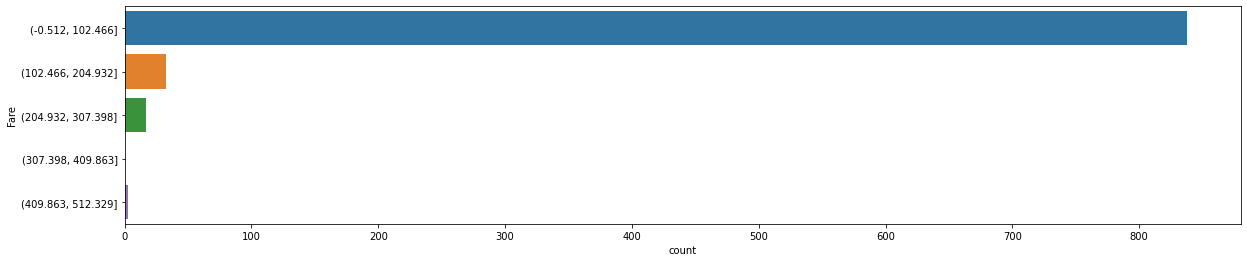

In [0]:
#let's visualize the bins in our discretised continuous variables dataframe
plt.figure(figsize=(20,4))
sns.countplot(y='Fare',data=df_bin)

In [0]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,"(16.336, 32.252]",1,0,"(-0.512, 102.466]"
1,1,1,0,"(32.252, 48.168]",1,0,"(-0.512, 102.466]"
2,1,3,0,"(16.336, 32.252]",0,0,"(-0.512, 102.466]"
3,1,1,0,"(32.252, 48.168]",1,0,"(-0.512, 102.466]"
4,0,3,1,"(32.252, 48.168]",0,0,"(-0.512, 102.466]"


In [0]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


# Target Feature : CABIN
Cabin number

In [0]:
#How many missing values are there in cabin?
train['Cabin'].isnull().sum()

687

In [0]:
#What do the cabin values look like?
train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
E101           3
              ..
F38            1
A10            1
B41            1
C46            1
D9             1
Name: Cabin, Length: 147, dtype: int64

So there are 147 unique number of cabins and 687 missing cabin values. So to make our EDA fast, we won't add these values into our sub dataframes. 

# Target Feature : EMBARKED
Ports of Embarkment. C = CHERBOURG, Q = QUEENSTOWN, S = SOUTHAMPTON

In [0]:
#How many missing values are there in embarked?
train['Embarked'].isnull().sum()

2

S    644
C    168
Q     77
Name: Embarked, dtype: int64


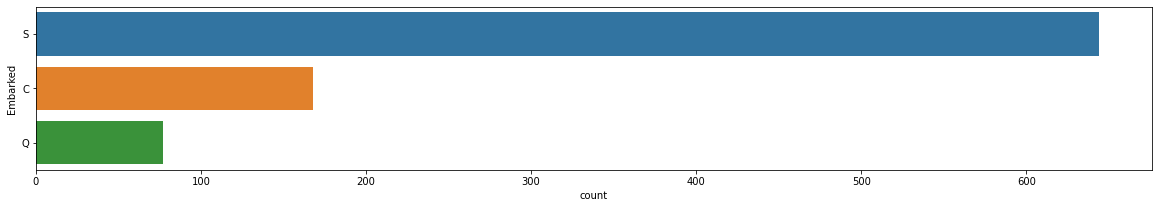

In [0]:
#let's visualize
plt.figure(figsize=(20,3))
sns.countplot(y='Embarked',data=train)
print(train['Embarked'].value_counts())

So we can say that it is a categorical data.

In [0]:
#Now to handle those two missing values we can either delete the two rows
#Or we can forward or backward fill the two values
#As of now we are removing the two rows after adding the embarked column 
#to our sub dataframes
df_bin['Embarked']=train['Embarked']
df_con['Embarked']=train['Embarked']

In [0]:
#Now let's remove the two rows
print(len(df_con))
df_con=df_con.dropna(subset=["Embarked"])
df_bin=df_bin.dropna(subset=["Embarked"])
print(len(df_con))

891
889


So we have removed the two rows with the missing values

In [0]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,"(16.336, 32.252]",1,0,"(-0.512, 102.466]",S
1,1,1,0,"(32.252, 48.168]",1,0,"(-0.512, 102.466]",C
2,1,3,0,"(16.336, 32.252]",0,0,"(-0.512, 102.466]",S
3,1,1,0,"(32.252, 48.168]",1,0,"(-0.512, 102.466]",S
4,0,3,1,"(32.252, 48.168]",0,0,"(-0.512, 102.466]",S


In [0]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


# FEATURE ENCODING
Now let us do the feature encoding by one hot encoder from sklearn

In [0]:
#Feature encoding the discretised continuous variables dataframe
one_hot_cols=df_bin.columns.to_list()
one_hot_cols.remove('Survived')
df_bin_enc=pd.get_dummies(df_bin,columns=one_hot_cols)
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,"Age_(0.34, 16.336]","Age_(16.336, 32.252]","Age_(32.252, 48.168]","Age_(48.168, 64.084]","Age_(64.084, 80.0]",SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [0]:
#Feature encoding the continuous dataframe
#here we will encode only the categorical datas and keep the other continuous datas as it is
one_hot_cols_1=df_con.columns.to_list()
one_hot_cols_1.remove('Survived')
one_hot_cols_1.remove('Age')
one_hot_cols_1.remove('SibSp')
one_hot_cols_1.remove('Parch')
one_hot_cols_1.remove('Fare')
df_con_enc=pd.get_dummies(df_con,columns=one_hot_cols_1)
df_con_enc.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


# BUILDING THE MACHINE LEARNING MODEL
 We will do hyperparameter tuning to find out which algorithm and parameters gives the best results.

# TRAIN TEST SPLIT
 We are splitting the train test data 80-20%

In [0]:
#Create a new dataframe and fit our continuous variables dataset into that
df=pd.DataFrame(df_con_enc)
df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [0]:
X=df.drop('Survived',axis='columns')
Y=df['Survived']

In [0]:
#splitting our training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train.head(10)

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S
75,25.0,0,0,7.6500,0,0,1,0,1,0,0,1
280,65.0,0,0,7.7500,0,0,1,0,1,0,1,0
608,22.0,1,2,41.5792,0,1,0,1,0,1,0,0
307,17.0,1,0,108.9000,1,0,0,1,0,1,0,0
489,9.0,1,1,15.9000,0,0,1,0,1,0,0,1
240,28.0,1,0,14.4542,0,0,1,1,0,1,0,0
529,23.0,2,1,11.5000,0,1,0,0,1,0,0,1
327,36.0,0,0,13.0000,0,1,0,1,0,0,0,1
290,26.0,0,0,78.8500,1,0,0,1,0,0,0,1
154,28.0,0,0,7.3125,0,0,1,0,1,0,0,1


# MATHEMATICAL MODELS WITH HYPERPARAMETER TUNING


In [0]:
#import all the models/algorithms to be used
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [0]:
#define all the models with their parameters
model_params={
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,10,20,25]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(splitter='best'),
        'params':{
            'criterion':['gini','entropy']
        }
    },
    'Gaussian_NB':{
        'model':GaussianNB(priors=None),
        'params':{
            'var_smoothing':[1e-09]
        }
    },
    'Multinomial_NB':{
        'model':MultinomialNB(),
        'params':{
            'alpha':[0,1]
        }
    }
}

In [0]:
#fit our classifier into all these models using GridSearchCV
scores=[]

for model_name,mp in model_params.items():
  clf=GridSearchCV(mp['model'],mp['params'],cv=5,
                   return_train_score=False)
  clf.fit(X_train,Y_train)
  scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_parameters':clf.best_params_
  })

otpt=pd.DataFrame(scores,columns=['model','best_score','best_parameters'])
otpt

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/nai

,model,best_score,best_parameters
0,svm,0.787570,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.810115,{'n_estimators': 20}
2,logistic_regression,0.804481,{'C': 1}
3,decision_tree,0.773555,{'criterion': 'gini'}
4,Gaussian_NB,0.786191,{'var_smoothing': 1e-09}
5,Multinomial_NB,0.677947,{'alpha': 0}


So let us take random forest with these parameters into account and check the evaluation on test data.

In [0]:
#score of random forest classifier on test data
RFC=RandomForestClassifier(n_estimators=20)
RFC.fit(X_train,Y_train)
RFC.score(X_test,Y_test)

0.8202247191011236

# ARTIFICIAL NEURAL NETWORK (ANN) 
let us see now if ANN works better than these above algorithms

In [0]:
#import ANN models and layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [0]:
#building my ANN
ANN=Sequential()

ANN.add(Dense(16,input_dim=12,init='uniform',activation='relu'))
ANN.add(Dense(8,init='uniform',activation='relu'))
ANN.add(Dense(1,init='uniform',activation='sigmoid'))
ANN.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

ANN.fit(X_train,Y_train,batch_size=20,epochs=50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, input_dim=12, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


Epoch 1/50
711/711 [==============================] - 0s 470us/step - loss: 0.6841 - accuracy: 0.6203
Epoch 2/50
711/711 [==============================] - 0s 59us/step - loss: 0.6555 - accuracy: 0.6371
Epoch 3/50
711/711 [==============================] - 0s 57us/step - loss: 0.6265 - accuracy: 0.6428
Epoch 4/50
711/711 [==============================] - 0s 58us/step - loss: 0.6074 - accuracy: 0.6737
Epoch 5/50
711/711 [==============================] - 0s 56us/step - loss: 0.5978 - accuracy: 0.6779
Epoch 6/50
711/711 [==============================] - 0s 62us/step - loss: 0.5886 - accuracy: 0.6807
Epoch 7/50
711/711 [==============================] - 0s 58us/step - loss: 0.5822 - accuracy: 0.6807
Epoch 8/50
711/711 [==============================] - 0s 57us/step - loss: 0.5788 - accuracy: 0.6892
Epoch 9/50
711/711 [==============================] - 0s 58us/step - loss: 0.5687 - accuracy: 0.6920
Epoch 10/50
711/711 [==============================] - 0s 58us/step - loss: 0.5602 - accur

In [0]:
ANN.evaluate(X_test,Y_test)

178/178 [==============================] - 0s 129us/step


[0.47459687811605045, 0.7752808928489685]

# So we are taking Random Forest Classifier as it is giving better accuracy than Artificial Neural Network

# FIT MODEL INTO TEST DATASET

In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
X_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S
75,25.0,0,0,7.6500,0,0,1,0,1,0,0,1
280,65.0,0,0,7.7500,0,0,1,0,1,0,1,0
608,22.0,1,2,41.5792,0,1,0,1,0,1,0,0
307,17.0,1,0,108.9000,1,0,0,1,0,1,0,0
489,9.0,1,1,15.9000,0,0,1,0,1,0,0,1


In [0]:
#How many missing values are there in test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Figure size 1440x720 with 0 Axes>

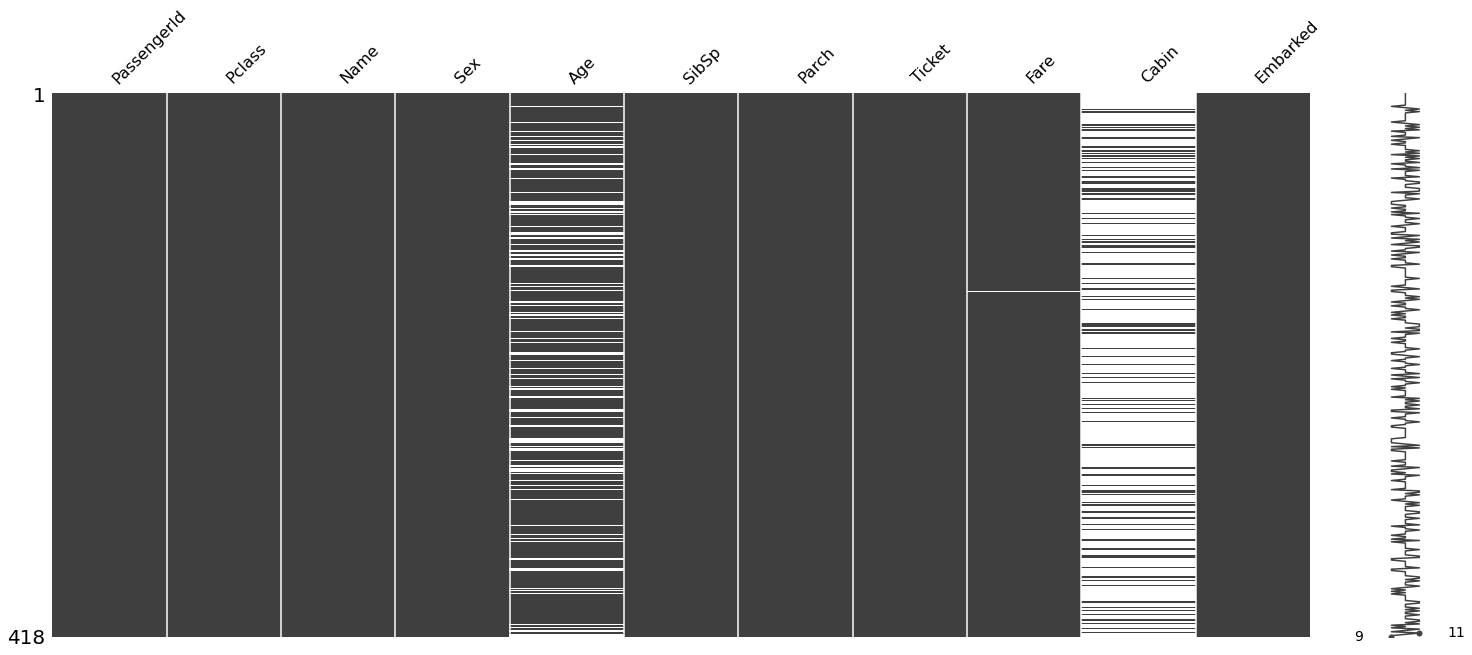

In [278]:
#let's visualize the columns
plt.figure(figsize=(20,10))
missingno.matrix(test)

In [279]:
#let's match our columns with the X_train dataset because that is what we want to predict our data
df_test=pd.DataFrame(test)
df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns',inplace=True)
df_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [280]:
#label encode the sex columns 
df_test['Sex']=le.fit_transform(df_test['Sex'])
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [0]:
#fill the missing values in the age column by taking median values
median_age1=math.floor(df_test['Age'].median())
df_test['Age']=df_test['Age'].fillna(median_age1)

In [0]:
#fill the missing values in the fare column by forward fill
df_test['Fare']=df_test['Fare'].fillna(method="ffill")

<Figure size 1440x720 with 0 Axes>

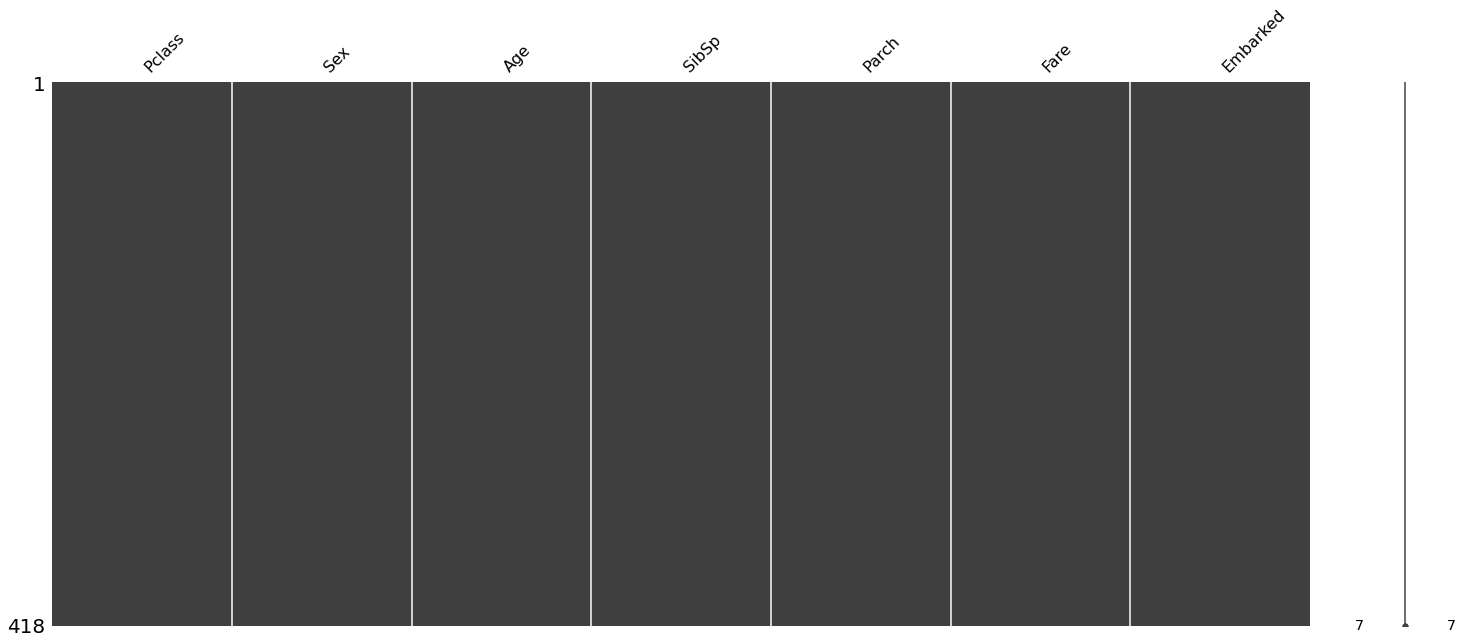

In [283]:
#let's now visualize if there are any missing values in the dataset
plt.figure(figsize=(20,10))
missingno.matrix(df_test)

In [286]:
#So there are no more missing values in the dataset
#Also let's check the dataset as we don't want to alter number of rows
#It must be 418
df_test.shape

(418, 7)

In [287]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [288]:
#let's now do one hot encoding on our categorical datas i.e., Pclass, Sex, Embarked
one_hot_cols_2=df_test.columns.to_list()
one_hot_cols_2.remove('Age')
one_hot_cols_2.remove('SibSp')
one_hot_cols_2.remove('Parch')
one_hot_cols_2.remove('Fare')
df_test_enc=pd.get_dummies(df_test,columns=one_hot_cols_2)
df_test_enc.head(10)

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
5,14.0,0,0,9.2250,0,0,1,0,1,0,0,1
6,30.0,0,0,7.6292,0,0,1,1,0,0,1,0
7,26.0,1,1,29.0000,0,1,0,0,1,0,0,1
8,18.0,0,0,7.2292,0,0,1,1,0,1,0,0
9,21.0,2,0,24.1500,0,0,1,0,1,0,0,1


In [289]:
df_test_enc.shape

(418, 12)

Now let us fit the data into our Random forest Classifier model

In [0]:
#test model Random Forest Classifier with the test dataset
y_pred=RFC.predict(df_test_enc)
y_pred=(y_pred>0.5)

In [292]:
#create a dataframe with Passenger Id and the Survived output for this test dataset
df_sub=pd.DataFrame()
df_sub['PassengerId']=test['PassengerId']
df_sub['Survived']=y_pred
df_sub.head(10)

,PassengerId,Survived
0,892,False
1,893,False
2,894,False
3,895,True
4,896,True
5,897,False
6,898,False
7,899,False
8,900,True
9,901,False


In [293]:
#So convert the survived values into integer of 0's and 1's
#We are doing label encoding for that
df_sub['Survived']=le.fit_transform(df_sub['Survived'])
df_sub.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


# Let's export the data into CSV file


In [294]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
df_sub.to_csv('titanic2.csv')
!cp titanic2.csv "drive/My Drive/"


# FEATURE IMPORTANCE
Which features of the best model were most important for making predictions?

In [0]:
# Feature Importance
def feature_importance(model, data):
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20,10))
    return fea_imp

,imp,col
10,0.007029,Embarked_Q
9,0.009409,Embarked_C
11,0.013915,Embarked_S
5,0.018627,Pclass_2
4,0.021513,Pclass_1
2,0.041278,Parch
1,0.041680,SibSp
6,0.048858,Pclass_3
8,0.089918,Sex_1
7,0.226162,Sex_0


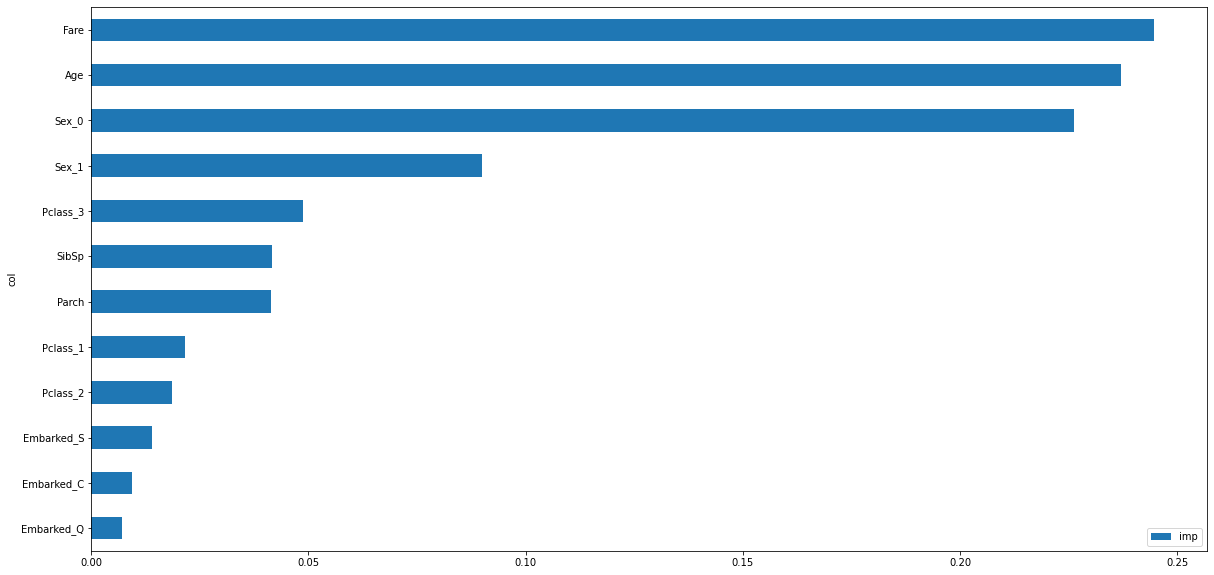

In [308]:
#Plot the feature importance scores
feature_importance(RFC,X_train)

# Thank You!